# Coordinate-based extraction along a "path".

Examples:

- Vertical slices/transects:
 - (x, y) path within (x, y, z) space
 - (x, y, t) path within (x, y, z, t) space
- Trajectories:
 - (x, y) path within (x, y) space
 - (x, y, z) path within (x, y, z) space
 - (x, y, z, t) path within (x, y, z, t) space
- Horizontal transect:
 - At a specific z level
 
Interpolation control should allow for different schemes for different "axes", e.g. nearest/linear for (x, y), spline for depth.

## Method

```python
# Analagous Iris API for regridding...
cube.interpolate(sample_points, scheme)

# Extend the `scheme` description
field.interpolate(..., x=Nearest, z=Spline)

# pandas/xarray style
field.sel_points(x=[1.1, 1.9], method='nearest')
field.sel_points(x=[...], y=[...], z=[...], method='nearest')
field.sel_points(x=[...], y=[...], z=[...], method={'xy': 'nearest', 'z': 'spline'})

# xarray custom accessors: https://github.com/pydata/xarray/pull/806
# i.e. Operating on a real xarray DataArray object
da.cf.sel_points(x=[...], ..., method={'xy': ...})
```

## Function

```python
api.interpolate(field, samples={'x': [...], 'y': [...], 'z': [...]},
                method={'xy': 'nearest', 'z': 'spline'})
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4
import xarray

In [2]:
path = '/home/h05/ithr/git/pyugrid/test_bed/small_trigrid_example.nc'
path = '/home/h05/ithr/git/iris/fvcom_1step.nc'

In [3]:
!ncdump -h {path}

netcdf fvcom_1step {
dimensions:
	time = UNLIMITED ; // (1 currently)
	DateStrLen = 26 ;
	node = 417642 ;
	nele = 826866 ;
	three = 3 ;
	siglay = 5 ;
variables:
	char Times(time, DateStrLen) ;
		Times:_Netcdf4Dimid = 0 ;
		Times:time_zone = "UTC" ;
		Times:_DODS_strlen = 26 ;
		Times:_DODS_dimName = "DateStrLen" ;
	int fvcom_mesh ;
		fvcom_mesh:face_coordinates = "lonc latc" ;
		fvcom_mesh:face_node_connectivity = "nv" ;
		fvcom_mesh:standard_name = "mesh_topology" ;
		fvcom_mesh:dimension = 2 ;
		fvcom_mesh:node_coordinates = "lon lat" ;
	float h(node) ;
		h:long_name = "Bathymetry" ;
		h:standard_name = "sea_floor_depth_below_geoid" ;
		h:units = "m" ;
		h:coordinates = "lat lon" ;
		h:type = "data" ;
		h:mesh = "fvcom_mesh" ;
		h:location = "node" ;
		h:_Netcdf4Dimid = 3 ;
	float lat(node) ;
		lat:_Netcdf4Dimid = 3 ;
		lat:long_name = "Latitude" ;
		lat:standard_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:valid_min = 18.151389 ;
		lat:valid_max = 31.010635 ;
	float lat

In [4]:
nc = netCDF4.Dataset(path)
print nc

<type 'netCDF4.Dataset'>
root group (NETCDF3_64BIT data model, file format UNDEFINED):
    title: FVCOM - IKE - Ultralite - Variable Drag - No Waves - 2D
    institution: USF - University of South Florida, Inundation
    source: FVCOM v3.1
    contact: lzheng@marine.usf.edu
    history: Tue Nov 20 10:23:25 2012: ncks -d time,0 http://testbedapps.sura.org/thredds/dodsC/alldata/rsignell/fvcom.nc fvcom_1step.nc
Model started at 12:00 on 07/31/2008 and finished at  12:00 on 09/17/2008
    references: http://fvcom.smast.umassd.edu
    id: in.usf.fvcom.ike.ultralite.vardrag.nowave.2d
    cdm_data_type: any
    _DODS_Unlimited_Dimension: time
    NCO: 4.0.1
    dimensions(sizes): time(1), DateStrLen(26), node(417642), nele(826866), three(3), siglay(5)
    variables(dimensions): |S1 Times(time,DateStrLen), int32 fvcom_mesh(), float32 h(node), float32 lat(node), float32 latc(nele), float32 lon(node), float32 lonc(nele), float32 maxele(node), float32 nv(three,nele), float32 siglay(siglay), float

In [5]:
ds = xarray.open_dataset(path)

In [6]:
ds

<xarray.Dataset>
Dimensions:     (nele: 826866, node: 417642, siglay: 5, three: 3, time: 1)
Coordinates:
    lat         (node) float32 21.083 21.0903 21.0993 21.1091 21.1196 ...
    latc        (nele) float32 21.1057 21.0974 21.1029 21.1175 21.1142 ...
    lon         (node) float32 -86.77 -86.7425 -86.7131 -86.6815 -86.6475 ...
    lonc        (nele) float32 -86.7624 -86.752 -86.733 -86.7213 -86.7007 ...
  * siglay      (siglay) float32 1.35632e-19 4.41601e+21 1.60196e-19 ...
  * time        (time) datetime64[ns] 2008-09-10
  * nele        (nele) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * node        (node) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * three       (three) int64 0 1 2
Data variables:
    Times       (time) |S26 '2008-09-10T00:00:00.000000'
    fvcom_mesh  int32 -2147483647
    h           (node) float32 108.384 9.03441 12.5637 12.5637 22.1857 ...
    maxele      (node) float64 0.4185 0.4208 0.4208 0.4231 0.4239 0.4257 ...
    nv       

In [7]:
ua = ds.ua
ua

<xarray.DataArray 'ua' (time: 1, nele: 826866)>
[826866 values with dtype=float64]
Coordinates:
    latc     (nele) float32 21.1057 21.0974 21.1029 21.1175 21.1142 21.1282 ...
    lonc     (nele) float32 -86.7624 -86.752 -86.733 -86.7213 -86.7007 ...
  * time     (time) datetime64[ns] 2008-09-10
  * nele     (nele) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    long_name: Vertically Averaged x-velocity
    units: meters s-1
    type: data
    field: ua, scalar
    coverage_content_type: modelResult
    standard_name: barotropic_eastward_sea_water_velocity
    mesh: fvcom_mesh
    location: face
    _Netcdf4Dimid: 0

In [8]:
ua = ua[0]

In [9]:
small = ua[::10000]

In [37]:
small = ua[(ua.lonc < -97) & (ua.latc > 27.4) & (ua.latc < 27.5)]
print small.shape
print xarray.ufuncs.isnan(small).all()
small = small.dropna('nele')
print small.shape

(2866,)
<xarray.DataArray 'ua' ()>
array(False, dtype=bool)
Coordinates:
    time     datetime64[ns] 2008-09-10
(161,)


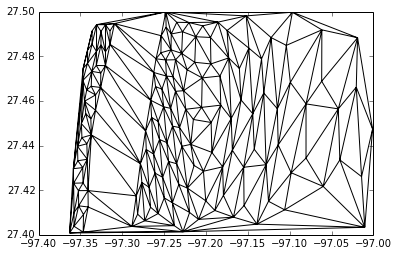

In [39]:
N = 1
plt.triplot(small[::N].lonc, small[::N].latc)

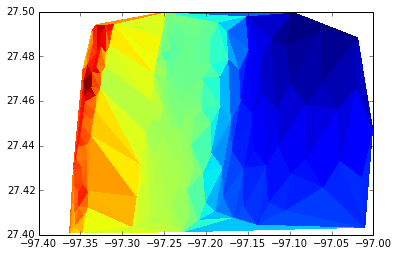

In [40]:
plt.tripcolor(small[::N].lonc, small[::N].latc, small[::N])